In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('Train columns with null values:\n', titanic_df.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


only age, cabin and embarked has missing value

In [7]:
print('Test columns with null values:\n', test_df.isnull().sum())

Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


only age,cabin and fare has missing value

# Step 1 drop unnecessary columns, 
these columns won't be useful in analysis and prediction

In [8]:
titanic_df_d1 = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_d_d1    = test_df.drop(['Name','Ticket'], axis=1)


In [9]:
titanic_df_d1.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
test_d_d1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [11]:
print('Train columns with null values:\n', titanic_df_d1.isnull().sum())

Train columns with null values:
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Cabin has too many missing value we need to drop it.

In [12]:
titanic_df_d2 = titanic_df_d1.drop(['Cabin'], axis=1)
titanic_df_d2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Also drop cabin in test

In [13]:
print('Test columns with null values:\n', test_d_d1.isnull().sum())

Test columns with null values:
 PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
test_d_d2 = test_d_d1.drop(['Cabin'], axis=1)
test_d_d2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


# Step 2 cleaning dataset

Embark
only in titanic_df, fill the two missing values with the most occurred value, which is "S".

In [15]:
titanic_df_d2["Embarked"] = titanic_df_d2["Embarked"].fillna("S")

In [16]:
titanic_df_d2.drop(['Embarked'], axis=1,inplace=True)

In [17]:
test_d_d2.drop(['Embarked'], axis=1,inplace=True)

In [18]:
titanic_df_d2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [19]:
test_d_d2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


Fare only missing in test
filling with median

In [20]:
test_d_d2['Fare'] = test_d_d2['Fare'].fillna(test_d_d2['Fare'].median())

Age filling with median

In [21]:
titanic_df_d2['Age'].median()

28.0

In [22]:
titanic_df_d2["Age"] = titanic_df_d2["Age"].fillna(titanic_df_d2['Age'].median())

In [23]:
test_d_d2['Age'] = test_d_d2['Age'].fillna(test_d_d2['Age'].median())

In [24]:
print('Train columns with null values:\n', titanic_df_d2.isnull().sum())

Train columns with null values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [25]:
print('Test columns with null values:\n', test_d_d2.isnull().sum())

Test columns with null values:
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


# Step 3 EDA

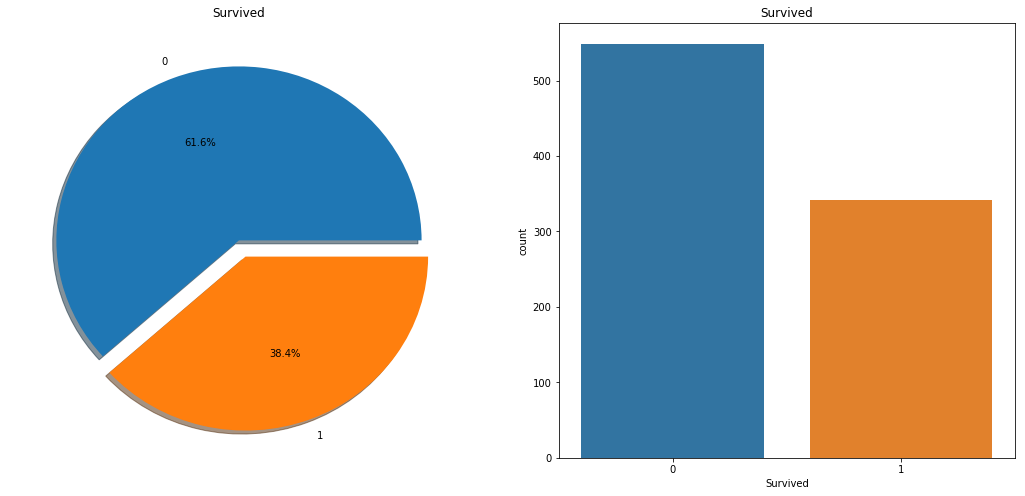

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_df_d2['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=titanic_df_d2,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [26]:
a=pd.crosstab(titanic_df_d2.Sex,titanic_df_d2.Survived,margins=True)
a.transpose()


Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [27]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[81,468],[233,109]])
pvalue

6.4639215645790451e-60

In [28]:
from scipy.stats import chi2_contingency
chi2_contingency([[81,468],[233,109]])

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

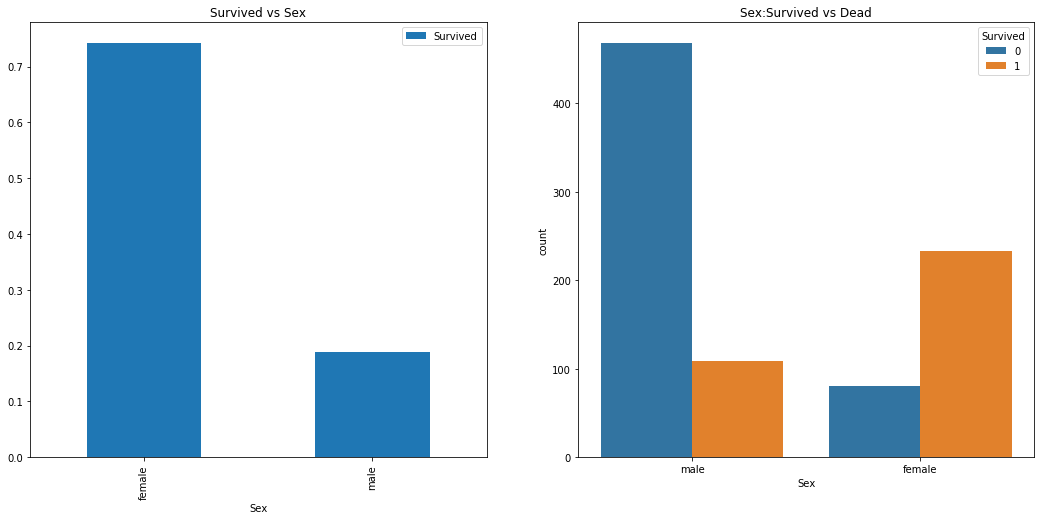

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_df_d2[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=titanic_df_d2,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

try to use fisher exact test

In [30]:
b=pd.crosstab(titanic_df_d2.Pclass,titanic_df_d2.Survived,margins=True)
b.transpose()


Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [31]:
from scipy.stats import chi2_contingency
chi2_contingency([[80,97,372],[136,87,119]])

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

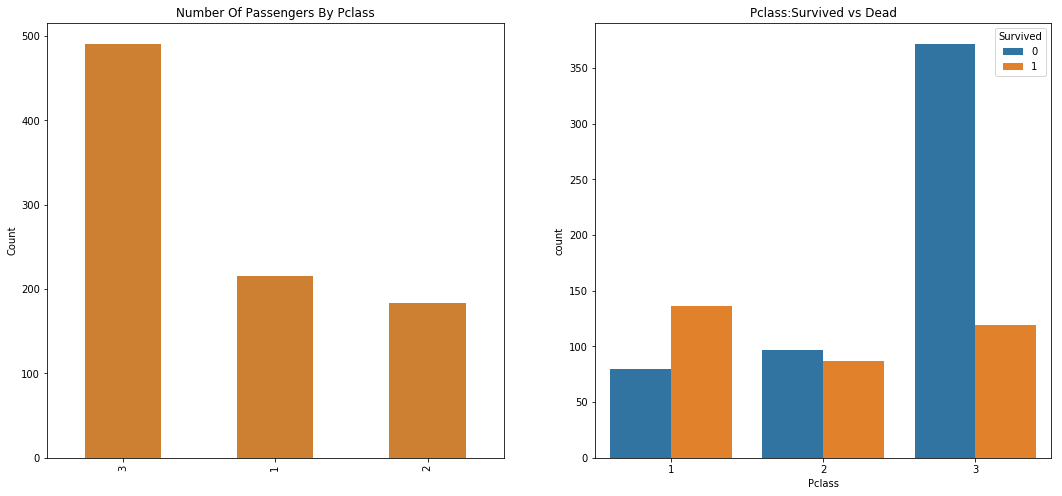

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_df_d2['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=titanic_df_d2,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [33]:
print('Oldest Passenger was of:',titanic_df_d2['Age'].max(),'Years')
print('Youngest Passenger was of:',titanic_df_d2['Age'].min(),'Years')
print('Average Age on the ship:',titanic_df_d2['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.36158249158249 Years


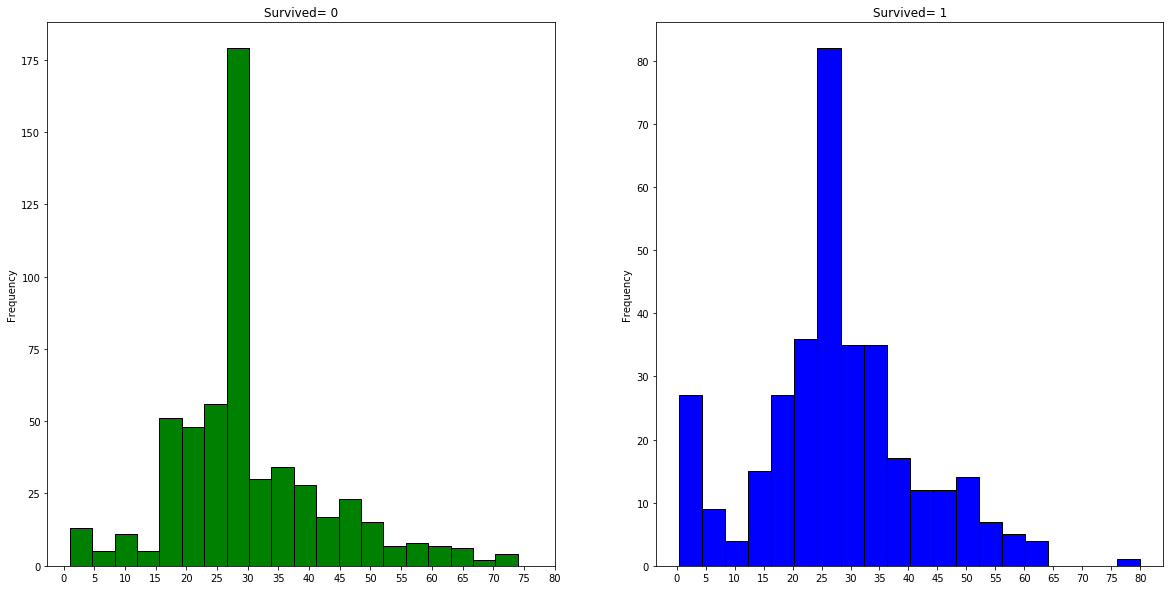

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic_df_d2[titanic_df_d2['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='green')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic_df_d2[titanic_df_d2['Survived']==1].Age.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

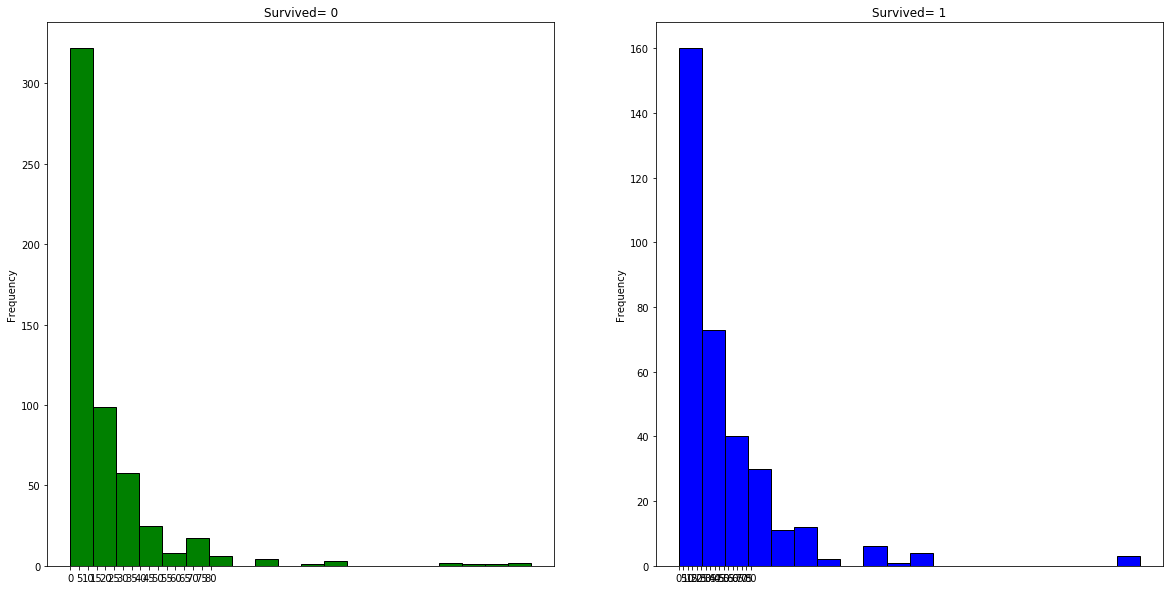

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic_df_d2[titanic_df_d2['Survived']==0].Fare.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='green')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic_df_d2[titanic_df_d2['Survived']==1].Fare.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

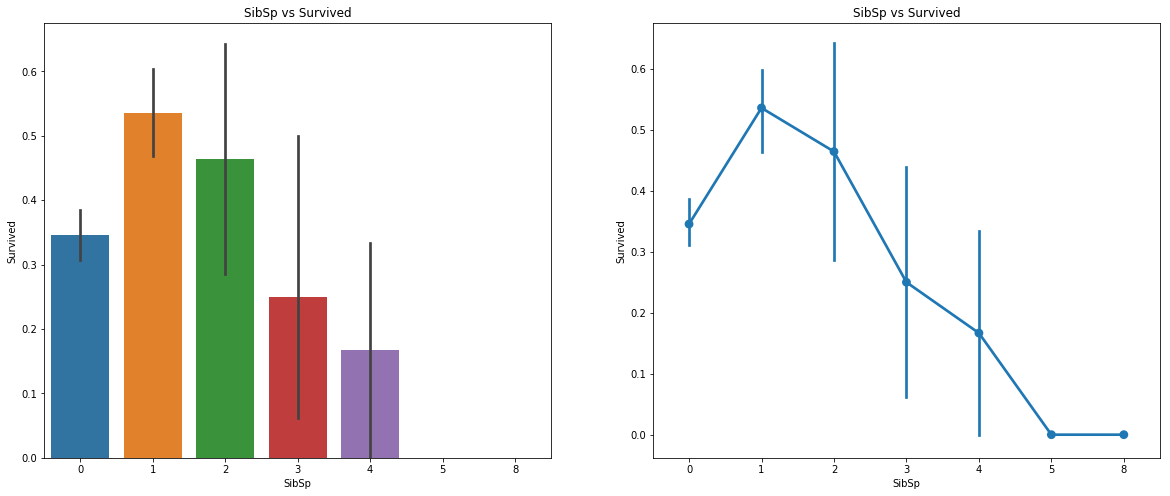

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=titanic_df_d2,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=titanic_df_d2,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

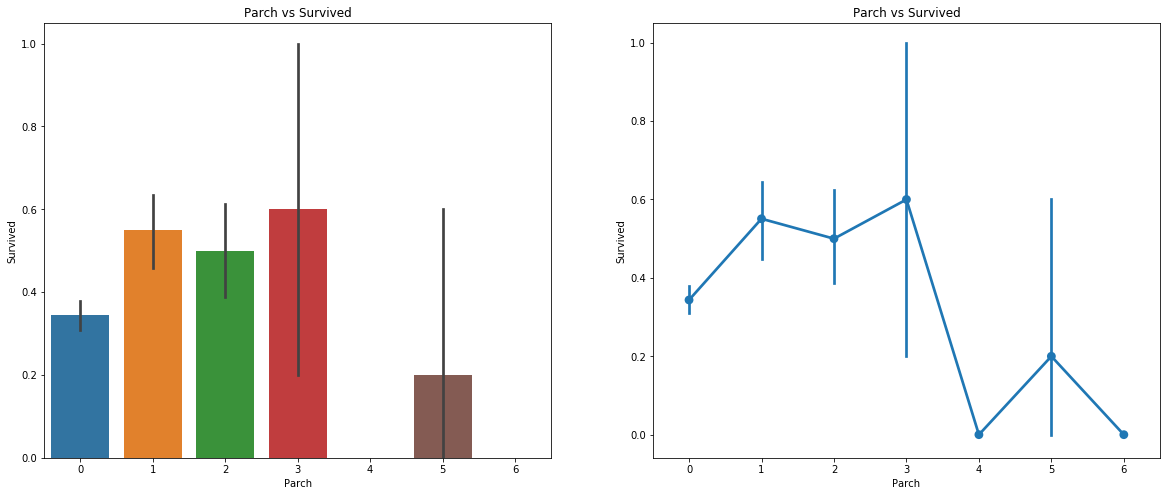

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=titanic_df_d2,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=titanic_df_d2,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

AttributeError: 'Series' object has no attribute 'log'

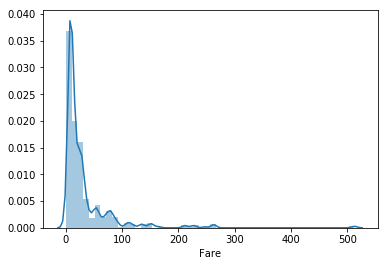

In [37]:
sns.distplot(titanic_df_d2['Fare'])
titanic_df_d2['Fare'].log

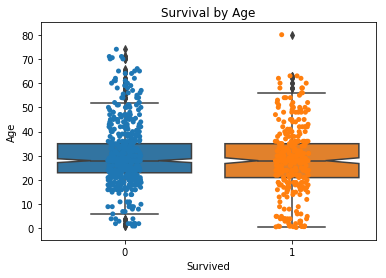

In [43]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic_df_d2,notch=True)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_df_d2, jitter=True,
                   edgecolor="gray")
ax.set_title("Survival by Age",fontsize=12);


In [55]:
newfare=titanic_df_d2["Fare"].apply(np.log)

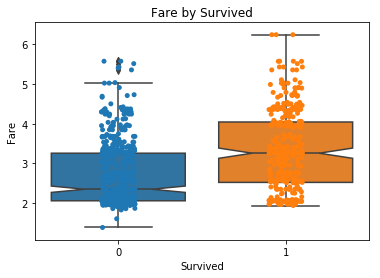

In [60]:

ax = sns.boxplot(x="Survived", y=newfare, 
                data=titanic_df_d2,notch=True)
ax = sns.stripplot(x="Survived", y=newfare,
                   data=titanic_df_d2, jitter=True,
                   edgecolor="gray")
ax.set_title("Fare by Survived",fontsize=12);

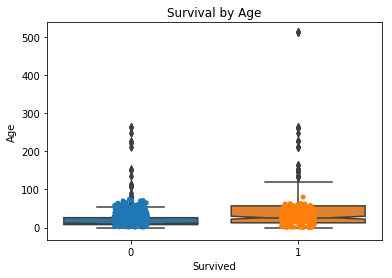

In [44]:
ax = sns.boxplot(x="Survived", y="Fare", 
                data=titanic_df_d2,notch=True)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_df_d2, jitter=True,
                   edgecolor="gray")
ax.set_title("Survival by Age",fontsize=12);

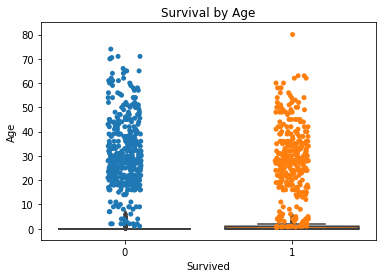

In [46]:
ax = sns.boxplot(x="Survived", y="Parch", 
                data=titanic_df_d2,notch=True)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_df_d2, jitter=True,
                   edgecolor="gray")
ax.set_title("Survival by Age",fontsize=12);

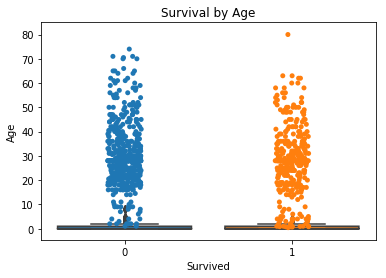

In [45]:
ax = sns.boxplot(x="Survived", y="SibSp", 
                data=titanic_df_d2,notch=True)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic_df_d2, jitter=True,
                   edgecolor="gray")
ax.set_title("Survival by Age",fontsize=12);

correlation 

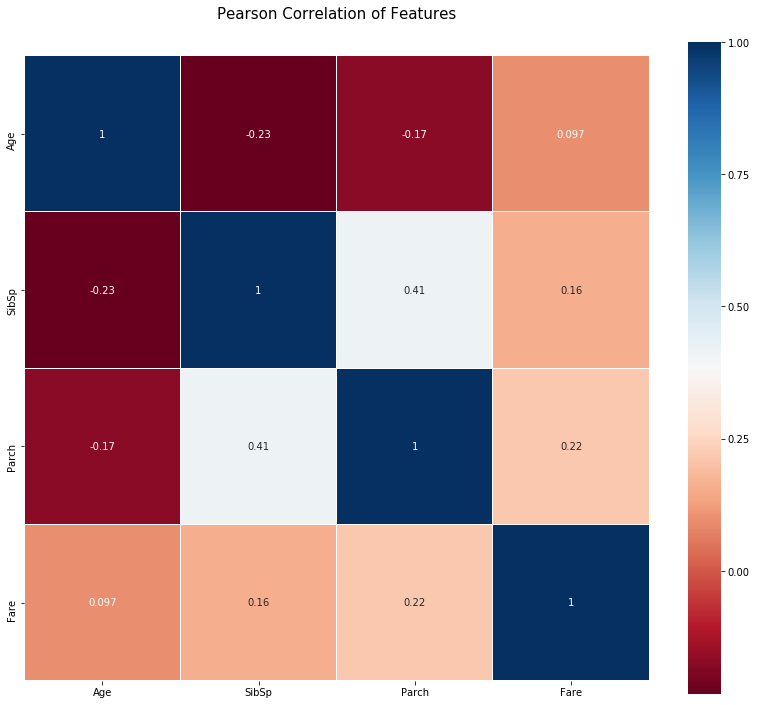

In [41]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
train_num=['Age','SibSp','Parch','Fare']
tr_num=titanic_df_d2[train_num]


plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(tr_num.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

two sample t test


# Step 4 prediction

logistic

In [62]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

D:\ana\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [92]:
titanic_df_d2['Sex'].replace(['male','female'],[0,1],inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [93]:
train_col=['Pclass','Sex','Age','SibSp','Parch','Fare']
tr_x=titanic_df_d2[train_col]
tr_x=pd.DataFrame(tr_x)
y, _ = pd.factorize(titanic_df_d2['Survived'])


In [94]:
kf = KFold(n_splits=10)

and the mean of acc score in the outer-fold experiment  0.787890137328
the total list of acc score in the outer-fold experiment is [0.77777777777777779, 0.8089887640449438, 0.7640449438202247, 0.7865168539325843, 0.7752808988764045, 0.7640449438202247, 0.7640449438202247, 0.7640449438202247, 0.8651685393258427, 0.8089887640449438]


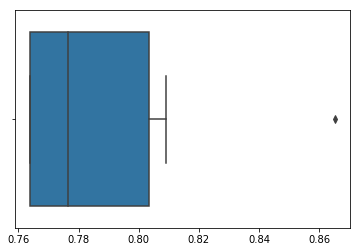

In [106]:
accstotal_log=[]
for train_index, test_index in kf.split(tr_x):
    accs=[]
    
    x_train, y_train =tr_x.iloc[train_index], y[train_index]
    x_test, y_test = tr_x.iloc[test_index], y[test_index]
    clt=LogisticRegression(random_state=1)
    clt.fit(x_train,y_train)
    pred = clt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    accstotal_log.append(acc)
    
    
print('and the mean of acc score in the outer-fold experiment ',np.mean(accstotal_log))
print('the total list of acc score in the outer-fold experiment is',accstotal_log)
ax1 = sns.boxplot(x = accstotal_log)
plt.show()    
    

In [104]:
clt.fit

<bound method LogisticRegression.fit of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [42]:
import statsmodels.api as sm


D:\ana\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [67]:
from sklearn.model_selection import cross_val_predict

In [75]:
test_x=train_col=['Pclass','Sex','Age','SibSp']

test_x=titanic_df_d2[train_col]
test_x=pd.DataFrame(test_x)

In [ ]:
test_2=train_col=['Pclass','Sex','SibSp','Child','Parch']

test_2=titanic_df_d2[train_col]
test_x=pd.DataFrame(test_x)

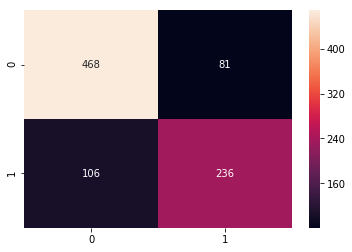

In [114]:

y_pred = cross_val_predict(LogisticRegression(random_state=1),test_x,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')

In [115]:
titanic_df_d2['Child']=0
titanic_df_d2.loc[titanic_df_d2['Age']<=15,'Child']=1
titanic_df_d2.loc[titanic_df_d2['Age']>=15,'Child']=0
titanic_df_d2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,0


In [117]:
test_2=['Pclass','Sex','SibSp','Child','Parch']
test_2=titanic_df_d2[test_2]
test_x_2=pd.DataFrame(test_2)

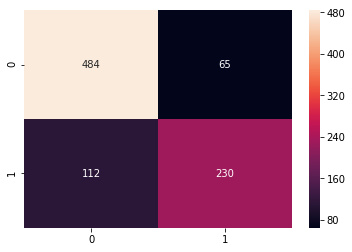

In [118]:
y_pred_child = cross_val_predict(LogisticRegression(random_state=1),test_x_2,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred_child),annot=True,fmt='2.0f')

In [120]:
y_pred_child = cross_val_predict(LogisticRegression(random_state=1),test_x_2,y,cv=10)
accuracy_score(y,y_pred_child)

0.80134680134680136

In [108]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=9)]
for i in models:
    model = i
    cv_result = cross_val_score(model,tr_x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.78789,0.030659
KNN,0.70040,0.048776


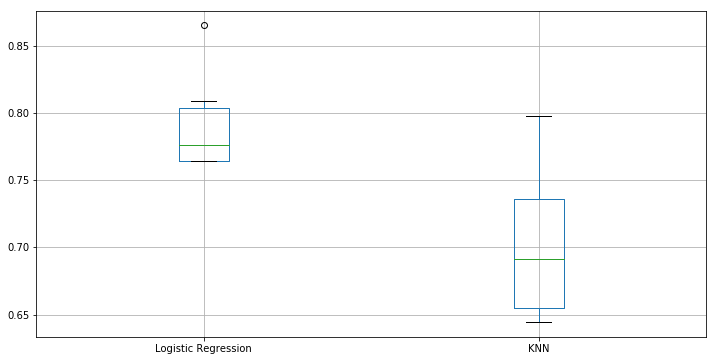

In [109]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

In [112]:
data1_dummy = pd.get_dummies(tr_x)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [65]:
logit = sm.Logit(y, tr_x)

In [66]:
result = logit.fit(criterion='bic')

Optimization terminated successfully.
         Current function value: 0.454532
         Iterations 6


In [67]:
print (result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.317     
Dependent Variable: y                AIC:              821.9751  
Date:               2018-04-22 16:42 BIC:              850.7292  
No. Observations:   891              Log-Likelihood:   -404.99   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      3.1420e-79
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    -0.5460     0.0726   -7.5259   0.0000   -0.6882   -0.4038
Sex        2.7608     0.1917   14.4049   0.0000    2.3851    3.1364
Age       -0.0152     0.0054   -2.7919   0.0052   -0.0259   -0.0045
SibSp     -0.3143     0.

AIC BIC here

KNN

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [180]:
# making our predictions
predictions = []
# create design matrix X and target vector y
X_train, X_test, y_train, y_test=train_test_split(tr_x,y,test_size=0.3,random_state=0,stratify=titanic_df_d2['Survived'])

The optimal number of neighbors is 3 with the max accuracy rate as  0.746268656716


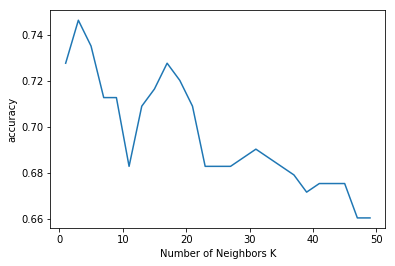

In [188]:
# creating odd list of K for KNN
myList = list(range(1,50))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cross validation scores
accstotal_knn=[]

# perform 10-fold cross validation we are already familiar with
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_test)
    acc = accuracy_score(y_test,prediction)
    accstotal_knn.append(acc)
optimal_k = neighbors[accstotal_knn.index(max(accstotal_knn))]
print("The optimal number of neighbors is %d" % optimal_k,'with the max accuracy rate as ',max(accstotal_knn))
# plot misclassification error vs k
plt.plot(neighbors, accstotal_knn)
plt.xlabel('Number of Neighbors K')
plt.ylabel('accuracy')
plt.show()

